## Unsupervised learning

In [ ]:
# dựa vào thuật toán, Unsupervised learning sẽ tạo ra target variable dựa trên các thuộc tính của predictor (X)

![](https://miro.medium.com/max/1400/1*VACikYaZIHb2OctTRohn8A.jpeg)

## Principal Component Analysis

![](https://lh6.googleusercontent.com/proxy/3PZWdYFTdEK49Wpf0Za7zNMTz56gCt-FYhhrcD7hTdgHz_QbPL1zJdp5wV2hKyFsagsA8Z3ukBpjmUFKAj01g3PnKmVCEzWEuoKIy6DtttdBd2aopy49_t2VXJrW4V576bOfs5roVD8XNtlcz37WqWShKfmYcJRDct_NhzzpO6PI6S6MMyaOMT8Q-GshW91WqAW88i0I-QWole1Nfq-ND6Cu4w3_pwGRX8KYHjNQhl0E8ekb2hxXi3qpICJAZapmEhju)

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()
sns.set_style('whitegrid')
from sklearn.decomposition import PCA #Principal component analysis
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Introducing Principal Component Analysis
Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:

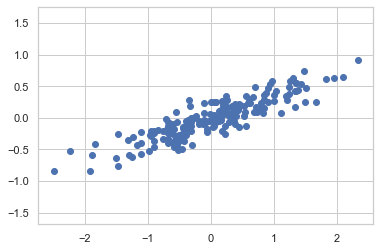

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by **finding a list of the principal axes in the data, and using those axes to describe the dataset**. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [6]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


## PCA as dimensionality reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [7]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = dict (arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0,
                      color = 'red')
    ax.annotate('',v1,v0, arrowprops=arrowprops)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

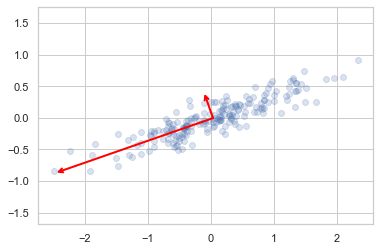

In [8]:
plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal')

In [6]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


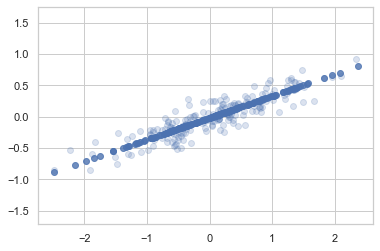

In [13]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, c='b')
plt.axis('equal');

## Example

In [14]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

![](https://www.researchgate.net/profile/Wolfgang-Engelmann/publication/265877256/figure/fig3/AS:669555605114885@1536645904238/Flower-of-a-plant-with-peduncle-a-calyx-consisting-of-sepals-petals-stamen-and-in.png)

## Standardize the Data

In [16]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values

In [17]:
y = df.loc[:,['species']].values

In [21]:
x = StandardScaler().fit_transform(x)
print(x[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [22]:
pd.DataFrame(data = x, columns = features)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [24]:
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponent,columns = ['PCA1','PCA2'])
principalDf

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [25]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [26]:
finalDf = pd.concat([principalDf,df[['species']]],axis=1)
finalDf            

,PCA1,PCA2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


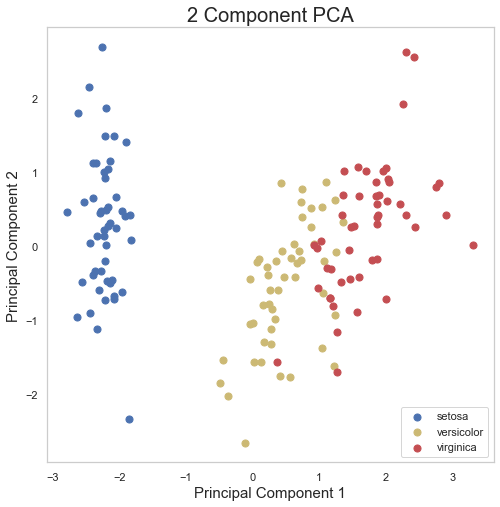

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['setosa', 'versicolor', 'virginica']
colors = ['b', 'y', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [25]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]
